In [5]:
import requests
import matplotlib
import pandas as pd

league_id = 761347
year = 2023

url = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/"+ str(year)+"/segments/0/leagues/" +str(league_id)

r = requests.get(url)

In [6]:
r = requests.get(url, 
                 params={"view": "mMatchup"})
matchups = r.json()

In [7]:
matchups_df = [[
        game['matchupPeriodId'],
        game['home']['teamId'], game['home']['totalPoints'],
        game['away']['teamId'], game['away']['totalPoints']
    ] for game in matchups['schedule']]
matchups_df = pd.DataFrame(matchups_df, columns=['Week', 'Team1', 'Score1', 'Team2', 'Score2'])
matchups_df.head()

,Week,Team1,Score1,Team2,Score2
0,1,14,71.06,15,58.84
1,1,1,113.36,5,131.44
2,1,7,127.14,17,92.76
3,1,12,86.62,6,139.74
4,1,2,77.54,4,78.00


In [10]:
r = requests.get(url, 
                 params={"view": "mTeams"})
teams = r.json()
teams

{'gameId': 1,
 'id': 761347,
 'members': [{'displayName': 'ESPNfan2715542106',
   'id': '{33A0F1F3-420C-4F5B-BFC6-1C5CC19832D3}',
   'isLeagueManager': False},
  {'displayName': 'msa025',
   'id': '{60554F8D-E1D1-4C49-8865-AA199EC5DC1C}',
   'isLeagueManager': False},
  {'displayName': 'dheelus',
   'id': '{68EE205B-16CE-4CA3-AE20-5B16CEDCA3B2}',
   'isLeagueManager': False},
  {'displayName': 'mcrusty85',
   'id': '{6F8E96DD-F709-4E97-8E96-DDF709AE9778}',
   'isLeagueManager': False},
  {'displayName': 'sanjay.bapat',
   'id': '{841C9731-7234-47C0-AE55-0F00CA66F1A9}',
   'isLeagueManager': False},
  {'displayName': 'viejid',
   'id': '{B31B9A6F-5F9F-400B-845D-A1A9977157E8}',
   'isLeagueManager': False},
  {'displayName': 'utcjl18',
   'id': '{E7E3C58B-7F36-4E69-98B0-C69886821900}',
   'isLeagueManager': False},
  {'displayName': 'McSasquatch',
   'id': '{EC36718A-4A47-48E1-B671-8A4A4718E14A}',
   'isLeagueManager': False},
  {'displayName': 'jchandapal',
   'id': '{F14E697A-3BD2-41B4

In [11]:
teams_df = [[
        team['id'],
        team['location'] + " " +
        team['nickname']
    ] for team in teams['teams']]
teams_df = pd.DataFrame(teams_df, columns=['TeamId', 'TeamName'])
teams_df

,TeamId,TeamName
0,1,Very Undude
1,2,Thai Dolla
2,4,Pierre Delecto
3,5,NoCo Hobos
4,6,www.computer soccer.uk
5,7,Fear Boners
6,12,Violent Videogame
7,13,Napoleon BonerFarts
8,14,Cobra Kyler
9,15,The Diamond Dogs


In [19]:
output = matchups_df.merge(
    teams_df, 
    left_on='Team1', 
    right_on='TeamId'
).rename(columns={"TeamName": "TeamName1", "TeamId": "TeamId1"}
).merge(
        teams_df,
        left_on = 'Team2',
        right_on = 'TeamId'
).rename(columns={"TeamName": "TeamName2", "TeamId": "TeamId2"})

teamScores = pd.concat( [
    output[['Week', 'TeamName1', 'Score1']].rename(columns={'Week':'Week', 'TeamName1': 'TeamName','Score1': 'Score'}),
    output[['Week', 'TeamName2', 'Score2']].rename(columns={'Week':'Week', 'TeamName2': 'TeamName','Score2': 'Score'}),
]
).sort_values(by=['TeamName','Week'])

# output[(output['TeamName1']=='Cobra Kyler') | (output['TeamName2']=='Cobra Kyler')].sort_values(by=['Week'])

TeamName
Cobra Kyler               Axes(0.125,0.11;0.775x0.77)
Fear  Boners              Axes(0.125,0.11;0.775x0.77)
Napoleon BonerFarts       Axes(0.125,0.11;0.775x0.77)
NoCo Hobos                Axes(0.125,0.11;0.775x0.77)
Pierre Delecto            Axes(0.125,0.11;0.775x0.77)
Thai Dolla                Axes(0.125,0.11;0.775x0.77)
The Diamond Dogs          Axes(0.125,0.11;0.775x0.77)
The Infirmary             Axes(0.125,0.11;0.775x0.77)
Very Undude               Axes(0.125,0.11;0.775x0.77)
Violent Videogame         Axes(0.125,0.11;0.775x0.77)
Wet Dream Team            Axes(0.125,0.11;0.775x0.77)
www.computer soccer.uk    Axes(0.125,0.11;0.775x0.77)
Name: Score, dtype: object

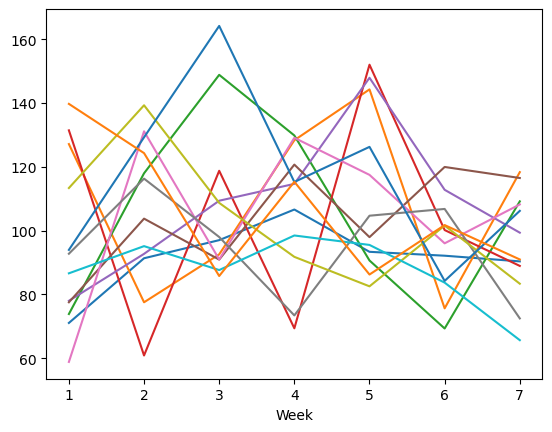

In [20]:
teamScores[teamScores['Week']<=7].set_index('Week').groupby('TeamName').Score.plot()